In [1]:
import numpy as np
import pandas as pd

In [2]:
data=pd.read_csv("output.csv323.csv.csv")

In [3]:
data.head()

,Unnamed: 0,Address,Lat,Long,Provider
0,0,"Mahindra Park, Uttam Nagar, new delhi",28.68453,77.13497,arcgis
1,1,"Mahipalpur, new delhi",28.54843,77.13636,arcgis
2,2,"ROHINI (NEW DELHI), new delhi",28.73352,77.10403,arcgis
3,3,"New Delhi, new delhi",28.63095,77.21728,arcgis
4,4,"Punjabi Bagh, new delhi",28.66634,77.12524,arcgis


In [4]:
df=pd.DataFrame(data)
df.head()

,Unnamed: 0,Address,Lat,Long,Provider
0,0,"Mahindra Park, Uttam Nagar, new delhi",28.68453,77.13497,arcgis
1,1,"Mahipalpur, new delhi",28.54843,77.13636,arcgis
2,2,"ROHINI (NEW DELHI), new delhi",28.73352,77.10403,arcgis
3,3,"New Delhi, new delhi",28.63095,77.21728,arcgis
4,4,"Punjabi Bagh, new delhi",28.66634,77.12524,arcgis


In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

/home/ashuposh/myenv/myenv/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


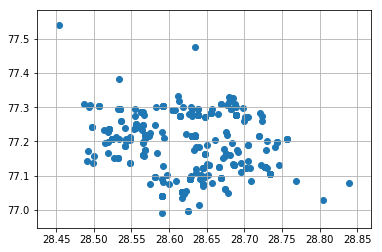

In [6]:
fig=plt.figure(0)
plt.grid("on")
plt.scatter(df['Lat'], df['Long'])
plt.show()
fig.savefig("plot.png", bbox_inches='tight')

In [7]:
df1=pd.DataFrame()
df1=df[['Lat','Long']]
df1.head()

,Lat,Long
0,28.68453,77.13497
1,28.54843,77.13636
2,28.73352,77.10403
3,28.63095,77.21728
4,28.66634,77.12524


In [9]:
from sklearn.cluster import MeanShift

In [29]:
ms = MeanShift( bin_seeding=False, cluster_all=True, min_bin_freq=1)

In [30]:
ms.fit(df1)

MeanShift(bandwidth=None, bin_seeding=False, cluster_all=True, min_bin_freq=1,
     n_jobs=1, seeds=None)

In [31]:
cluster_centers = ms.cluster_centers_

In [32]:
cluster_centers

array([[28.60584091, 77.24235061],
       [28.66062229, 77.15247405],
       [28.63396   , 77.47608   ],
       [28.45303   , 77.54085   ]])

In [33]:
import geocoder
for i in range(cluster_centers.shape[0]):
    g = geocoder.osm(list(cluster_centers[i]), method='reverse')
    print(g)


<[OK] Osm - Reverse [National Zoological Park Delhi, route a, South East Delhi, Delhi, 110013, India]>
<[OK] Osm - Reverse [West Delhi, Delhi, 110008, India]>
<[OK] Osm - Reverse [Ghaziabad, Uttar Pradesh, 201001, India]>
<[OK] Osm - Reverse [Greater Noida, Gautam Buddha Nagar, Uttar Pradesh, 201310, India]>
